In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pathlib
import os
import cv2

In [2]:
def show_bound_boxes(image, boxes, labels=None, tensor=False, title="Bounding Boxes", cv = True):
    _, ax = plt.subplots()
    if tensor: 
        image = image.detach().numpy().transpose(1, 2, 0)
    if cv:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    plt.title(title)
    if labels is not None:    
        for box, label in zip(boxes, labels):
            color = "green" if label == 1 else "red"
            width, height = box[2] - box[0], box[3] - box[1]
            bounding_box = patches.Rectangle((box[0], box[1]), width, height ,edgecolor=color, facecolor='none')
            ax.add_patch(bounding_box)
    else:
        for box in boxes:
            color = "red"
            width, height = box[2] - box[0], box[3] - box[1]
            bounding_box = patches.Rectangle((box[0], box[1]), width, height ,edgecolor=color, facecolor='none')
            ax.add_patch(bounding_box)
        
def show_tensor(tensor): 
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

# Loading Data

In [3]:
df1 = pd.read_json('./malaria/training.json')
df1.head()

,image,objects
0,{'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af...,"[{'bounding_box': {'minimum': {'r': 1057, 'c':..."
1,{'checksum': '1225a18efce159eddf7b0e80e0ea642c...,"[{'bounding_box': {'minimum': {'r': 734, 'c': ..."
2,{'checksum': '3eaf840523c30fdf38897ffa01e194eb...,"[{'bounding_box': {'minimum': {'r': 724, 'c': ..."
3,{'checksum': '8a111dffacfa433029492780b9535091...,"[{'bounding_box': {'minimum': {'r': 563, 'c': ..."
4,{'checksum': 'ccef403e971460b86444cca669e68ca1...,"[{'bounding_box': {'minimum': {'r': 618, 'c': ..."


In [4]:
print(df1['image'][0])

{'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af', 'pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png', 'shape': {'r': 1200, 'c': 1600, 'channels': 3}}


In [5]:
df1['path'] = df1['image'].apply(lambda x: x['pathname'])
df1['shape'] = df1['image'].apply(lambda x: x['shape'])
df1['shape'] = df1['shape'].apply(lambda x: (x['r'], x['c'], x['channels']))

In [7]:
def format_objects(objects):
    boxes = []
    labels = []
    categories = []
    for cell in objects:
        if cell['category'] != 'difficult':
            bbox = cell['bounding_box']
            x1 = bbox['minimum']['c']
            y1 = bbox['minimum']['r']
            x2 = bbox['maximum']['c']
            y2 = bbox['maximum']['r']
            boxes.append([x1,y1,x2,y2])
            category = cell['category']
            categories.append(category)
            if category=='red blood cell' or category=='leukocyte':
                label = 1
            else:
                label = 0
            labels.append(label)
    return {'boxes':np.array(boxes), 'labels':np.array(labels), 'categories':np.array(categories)}
           

In [8]:
df1['objects'] = df1['objects'].apply(format_objects)

In [9]:
df1.head()

,image,objects,path,shape
0,{'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af...,"{'boxes': [[1440, 1057, 1540, 1158], [1303, 86...",/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,"(1200, 1600, 3)"
1,{'checksum': '1225a18efce159eddf7b0e80e0ea642c...,"{'boxes': [[735, 734, 834, 832], [1283, 939, 1...",/images/10be6380-cbbb-4886-8b9e-ff56b1710576.png,"(1200, 1600, 3)"
2,{'checksum': '3eaf840523c30fdf38897ffa01e194eb...,"{'boxes': [[1027, 724, 1136, 834], [1155, 287,...",/images/6b14c855-8561-417c-97a4-63fa552842fd.png,"(1200, 1600, 3)"
3,{'checksum': '8a111dffacfa433029492780b9535091...,"{'boxes': [[1421, 563, 1545, 656], [324, 208, ...",/images/13099edb-35d9-438f-b093-2cf2ebf9d255.png,"(1200, 1600, 3)"
4,{'checksum': 'ccef403e971460b86444cca669e68ca1...,"{'boxes': [[688, 618, 810, 744], [1035, 689, 1...",/images/2559636b-f01a-4414-93da-210c3b12d153.png,"(1200, 1600, 3)"


In [10]:
rootpath = './malaria'

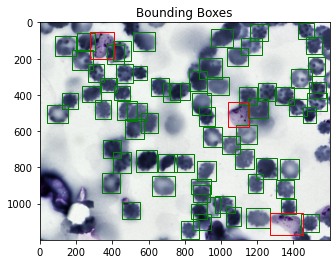

In [11]:
img = cv2.imread(rootpath + df1['path'][0])
objects = df1['objects'][0]
show_bound_boxes(img, objects['boxes'],  objects['labels'])

# cv2

In [12]:
def draw_contour_blank(size, contours, color=(100, 255, 255), fill=False):
    x, y = size
    img = np.zeros((x, y, 3), np.uint8)
    thick = -1 if fill else 3
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=color, thickness=thick)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

def contour_to_boxes(contours):
    boxes = []
    labels = []
    for contour in contours:
        box = list(cv2.boundingRect(contour))
        boxes.append(box)
        labels.append(1)
    return {'boxes':np.array(boxes), 'labels':np.array(labels)}

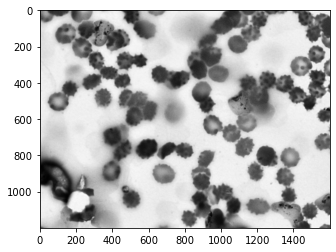

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

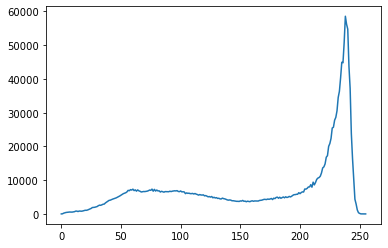

In [137]:
hist = cv2.calcHist([gray], [0], None, [256], [0,255]) 
plt.plot(hist)
plt.show()

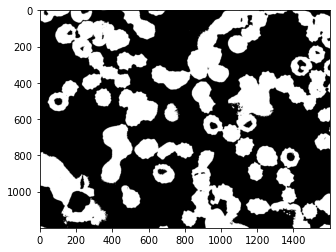

In [14]:
ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th = 255-th
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))

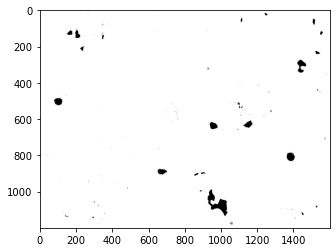

In [15]:
flood = cv2.copyMakeBorder(th, 1,1,1,1, cv2.BORDER_CONSTANT, value=0)
cv2.floodFill(flood, np.zeros((1204, 1604), np.uint8), (0, 0), 255)
flood = flood[1:1201, 1:1601]
plt.imshow(cv2.cvtColor(flood, cv2.COLOR_BGR2RGB))

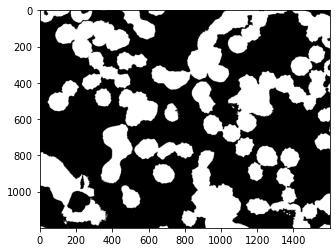

In [16]:
flood = 255-flood
filled = th | flood
plt.imshow(cv2.cvtColor(filled, cv2.COLOR_BGR2RGB))

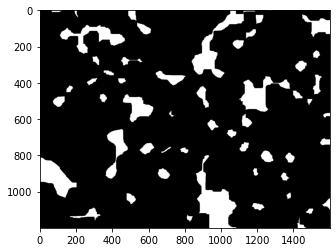

In [17]:
kernel = np.ones((5,5), dtype=np.uint8)
erd = cv2.erode(filled, kernel, iterations = 10)
plt.imshow(cv2.cvtColor(erd, cv2.COLOR_BGR2RGB))

55


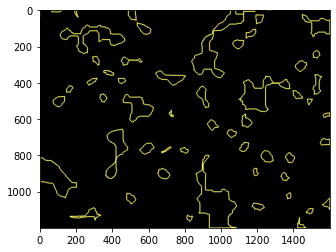

In [18]:
contours, hierarchy = cv2.findContours(erd, cv2.RETR_EXTERNAL, 2)
draw_contour_blank((1200,1600), contours)
print(len(contours))

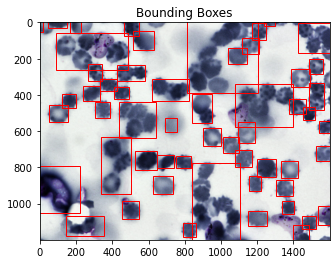

In [19]:
boxes = []
for contour in contours:
    box = list(cv2.boundingRect(contour))
    box[0] -= 22
    box[1] -= 22
    box[2] = box[0] + box[2] + 40
    box[3] = box[1] + box[3] + 40
    boxes.append(box)
show_bound_boxes(img, boxes)

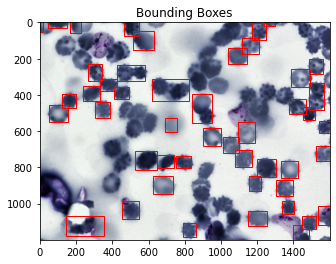

In [33]:
result=[]
for box in boxes: 
    area = (box[2] - box[0]) * (box[3] - box[1])
    if area < 25000:
        result.append(box)
show_bound_boxes(img, result)